# MCI and Healthy Cohorts Analysis

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

### Loading data

In [2]:
folder = "./MCI analysis/data/mci_analysis"
files = os.listdir(folder)

healthy_subjects = ['mci002.json', 'mci003.json', 'mci004.json', 'mci005.json', 'mci006.json', 'mci007.json', 'mci008.json', 'mci009.json', 'mci010.json']
columns = ['Total Time', 'Step Time', 'Swing Time', 'Stride Time', 'Total Steps', 'Cadence', 'Step Variability', 'Stride Variability', 'Median COP Speed', 'Total Activity']
columns_of_interest =  ['Total Time', 'Total Activity', 'Step Time', 'Swing Time', 'Stride Time', 'Total Steps', 'Cadence', 'Step Variability', 'Stride Variability', 'Median COP Speed']
columns_to_plot = ['Total Time', 'Total Activity', 'Stride Time', 'Total Steps', 'Cadence', 'Stride Variability', 'Median COP Speed']
# read the data from each file and add the healthy subjects together into healthy dataframe
healthy_data = pd.DataFrame()
mci_data = pd.DataFrame()
for file in files:
    if file in healthy_subjects:
        df = pd.read_json(os.path.join(folder, file))
        healthy_data = pd.concat([healthy_data, df], ignore_index=True)
        
    else:
        df = pd.read_json(os.path.join(folder, file))
        mci_data = pd.concat([mci_data, df], ignore_index=True)
healthy_data.columns = columns
healthy_data = healthy_data[columns_of_interest]
mci_data.columns = columns
mci_data = mci_data[columns_of_interest]

# Filter mci_data where 'Total Activity' is 0
mci_data_filtered = mci_data[mci_data['Total Activity'] > 0]

# Filter healthy_data where 'Total Activity' is 0
healthy_data_filtered = healthy_data[healthy_data['Total Activity'] > 0]



### Analysis

In [3]:
import pandas as pd
from scipy.stats import ttest_ind, describe

# Initialize a dictionary to store the results
results = {'Metric': [], 'Mean_Healthy': [], 'Mean_MCI': [], 'Median_Healthy': [], 'Median_MCI': [], 'Std_Healthy': [], 'Std_MCI': [], 'Range_Healthy': [], 'Range_MCI': [],
           'P-value': [], 'Significance': []}

# Loop through each metric and calculate the statistics
for column in columns_of_interest:
    # Perform the T-test
    t_stat, p_val = ttest_ind(healthy_data_filtered[column].dropna(), mci_data_filtered[column].dropna(), nan_policy='omit')
    
    # Determine the significance level
    significance_level = 0.05
    significance = "Significant" if p_val < significance_level else "Not Significant"
    
    # Calculate descriptive statistics for each group
    desc_healthy = describe(healthy_data[column].dropna())
    desc_mci = describe(mci_data[column].dropna())
    
    # Calculate the median for each group
    median_healthy = np.median(healthy_data[column].dropna())
    median_mci = np.median(mci_data[column].dropna())
    
    # Append the results to the dictionary
    results['Metric'].append(column)
    results['Mean_Healthy'].append("{:.2f}".format(desc_healthy.mean))
    results['Mean_MCI'].append("{:.2f}".format(desc_mci.mean))
    results['Median_Healthy'].append("{:.2f}".format(median_healthy))
    results['Median_MCI'].append("{:.2f}".format(median_mci))
    results['Range_Healthy'].append("({:.2f}, {:.2f})".format(desc_healthy.minmax[0], desc_healthy.minmax[1]))
    results['Range_MCI'].append("({:.2f}, {:.2f})".format(desc_mci.minmax[0], desc_mci.minmax[1]))
    results['Std_Healthy'].append("{:.2f}".format(desc_healthy.variance ** 0.5))
    results['Std_MCI'].append("{:.2f}".format(desc_mci.variance ** 0.5))
    results['P-value'].append("{:.2f}".format(p_val))
    results['Significance'].append(significance)

# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results, index=results['Metric']).drop('Metric', axis=1)
# Display the table
results_df


,Mean_Healthy,Mean_MCI,Median_Healthy,Median_MCI,Std_Healthy,Std_MCI,Range_Healthy,Range_MCI,P-value,Significance
Total Time,47.63,44.78,50.08,49.86,12.43,19.37,"(4.58, 64.13)","(3.23, 86.13)",0.29,Not Significant
Total Activity,24.32,14.49,21.02,11.57,23.79,15.14,"(0.00, 114.36)","(0.00, 69.04)",0.00,Significant
Step Time,0.76,0.92,0.75,0.89,0.16,0.19,"(0.50, 1.82)","(0.61, 1.65)",0.00,Significant
Swing Time,0.69,0.75,0.68,0.76,0.18,0.11,"(0.37, 1.86)","(0.56, 1.01)",0.07,Not Significant
Stride Time,1.36,1.59,1.34,1.50,0.27,0.27,"(0.99, 3.35)","(1.25, 2.42)",0.00,Significant
Total Steps,933.83,431.33,619.67,318.00,801.53,403.87,"(33.00, 3828.00)","(20.00, 1534.00)",0.00,Significant
Cadence,89.26,75.04,88.89,78.41,14.62,15.55,"(31.39, 122.17)","(17.05, 94.60)",0.00,Significant
Step Variability,0.74,0.83,0.63,0.67,0.48,0.57,"(0.28, 4.61)","(0.37, 3.45)",0.38,Not Significant
Stride Variability,0.66,0.72,0.59,0.56,0.43,0.44,"(0.16, 3.56)","(0.26, 2.05)",0.42,Not Significant
Median COP Speed,1.42,1.31,1.37,1.17,0.50,0.62,"(0.51, 3.17)","(0.49, 3.75)",0.27,Not Significant


### Plots 

comparing the Normal distribution (Bell Curves) and the Density between Healthy and MCI subjects

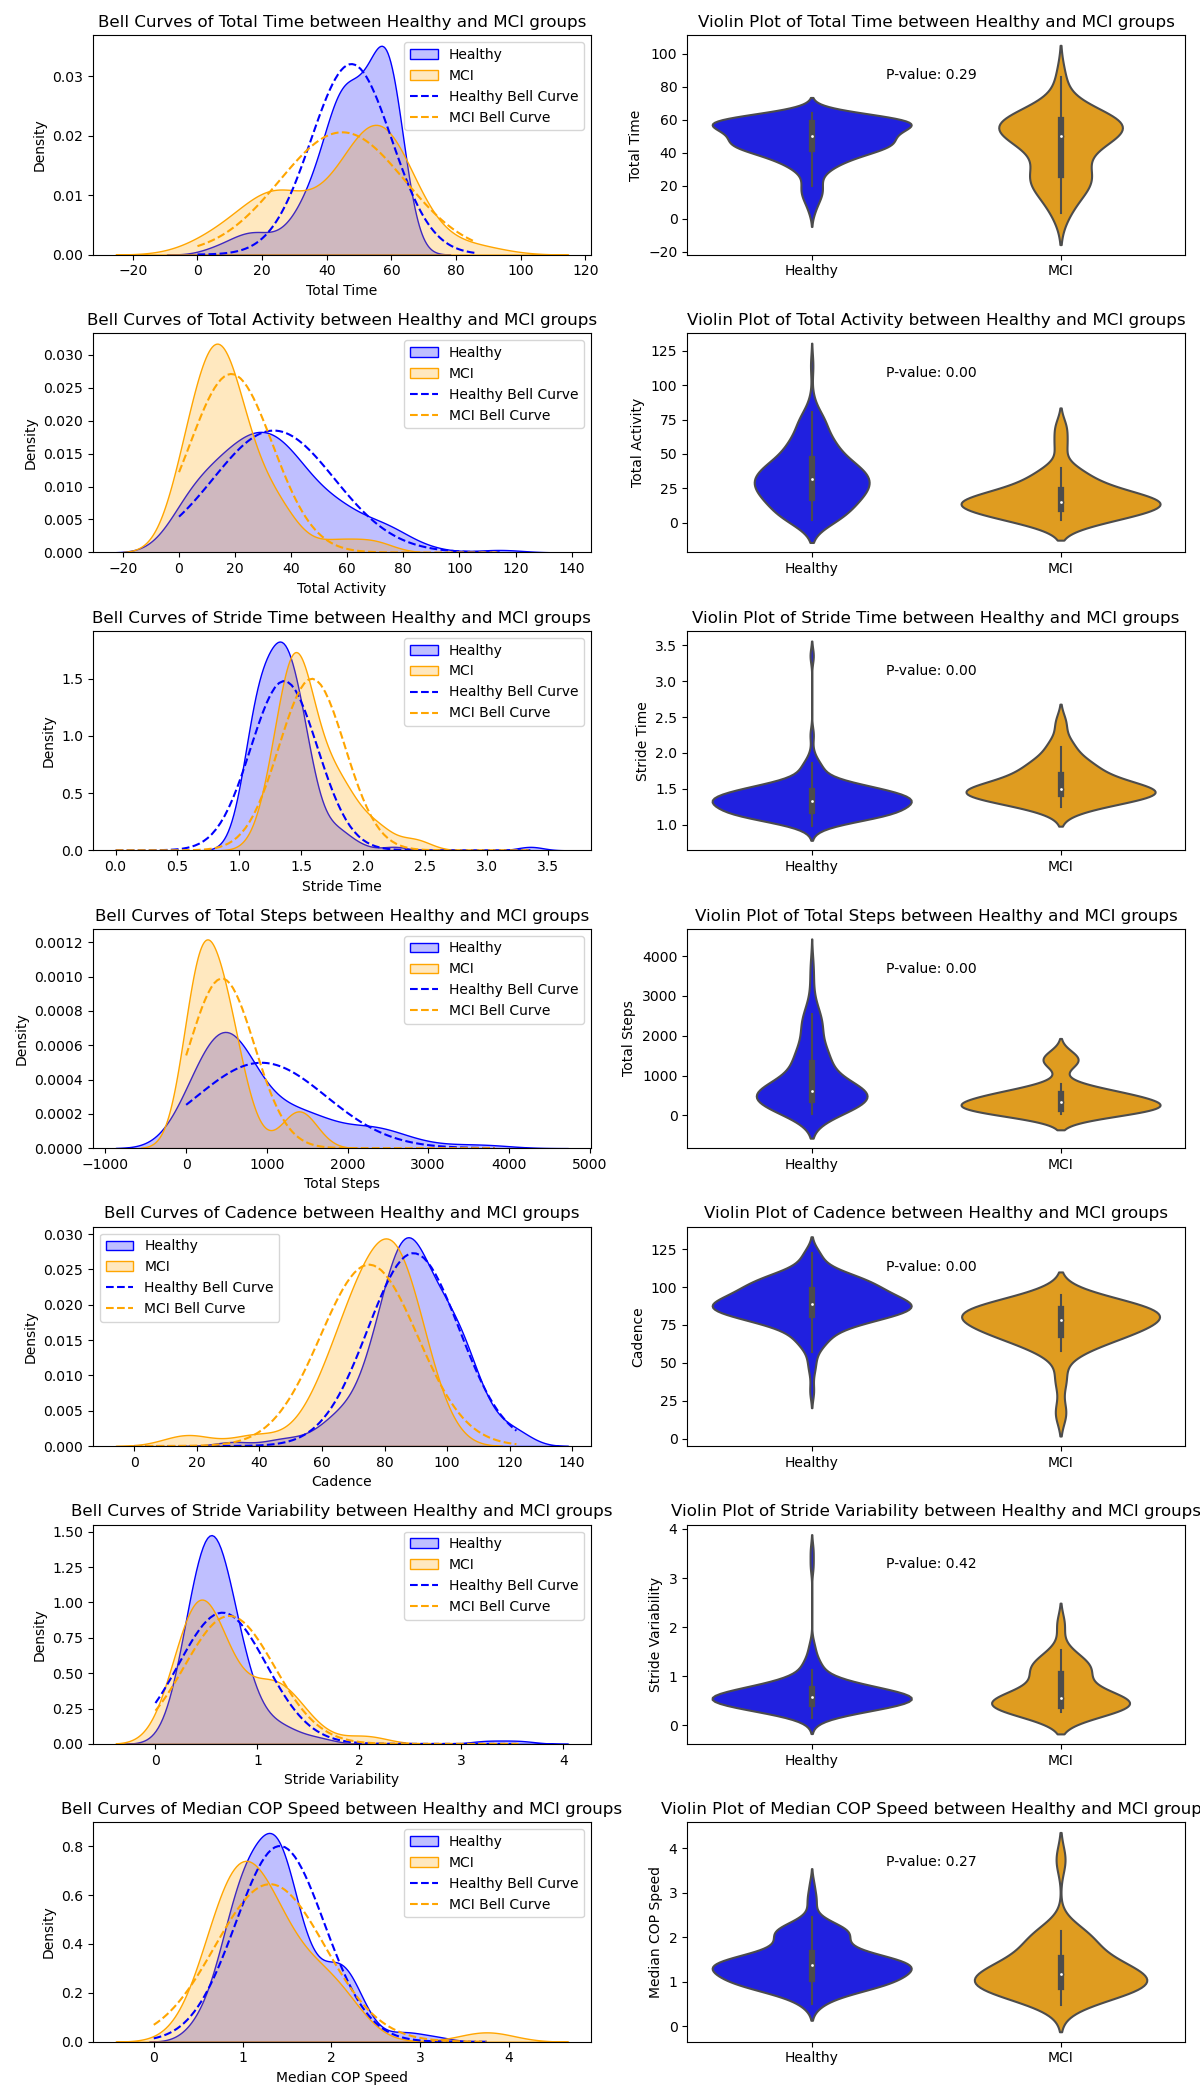

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm, ttest_ind


# Create subplots for each metric
fig, axs = plt.subplots(len(columns_to_plot), 2, figsize=(12, 3 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    # Select the data for the two groups
    data_healthy = healthy_data_filtered[column].dropna()
    data_mci = mci_data_filtered[column].dropna()

    # Plot the PDFs for each group in the left subplot
    sns.kdeplot(data_healthy, label='Healthy', shade=True, color='blue', ax=axs[i, 0])
    sns.kdeplot(data_mci, label='MCI', shade=True, color='orange', ax=axs[i, 0])

    # Calculate the mean and standard deviation for each group
    mean_healthy, std_healthy = data_healthy.mean(), data_healthy.std()
    mean_mci, std_mci = data_mci.mean(), data_mci.std()

    # Set the lower limit for x-axis range to exclude negative values
    x_min = 0
    x_max = max(data_healthy.max(), data_mci.max())

    # Plot bell curve for each group in the left subplot
    x = np.linspace(x_min, x_max, 100)
    axs[i, 0].plot(x, norm.pdf(x, mean_healthy, std_healthy), color='blue', linestyle='--', label='Healthy Bell Curve')
    axs[i, 0].plot(x, norm.pdf(x, mean_mci, std_mci), color='orange', linestyle='--', label='MCI Bell Curve')

    # Add legend and labels to the left subplot
    axs[i, 0].legend()
    axs[i, 0].set_title(f'Bell Curves of {column} between Healthy and MCI groups')
    axs[i, 0].set_xlabel(column)
    axs[i, 0].set_ylabel('Density')
    axs[i, 0].tight_layout()

    # Perform the T-test
    t_stat, p_val = ttest_ind(data_healthy, data_mci, nan_policy='omit')

    # Add violin plot for each group in the right subplot
    sns.violinplot(data=[data_healthy, data_mci], ax=axs[i, 1], palette=['blue', 'orange'], labels=['Healthy', 'MCI'])
    axs[i, 1].set_title(f'Violin Plot of {column} between Healthy and MCI groups')
    axs[i, 1].set_xticklabels(['Healthy', 'MCI'])
    axs[i, 1].set_ylabel(column)

    axs[i, 1].text(0.4, 0.8, f"P-value: {p_val:.2f}", transform=axs[i, 1].transAxes)
    axs[i, 0].tight_layout()

plt.tight_layout()
plt.show()
